## **FIX IDENTIFIKASI PENYAKIT EARLY BLIGHT PADA DAUN TOMAT MENGGUNAKAN MODEL DENSENET264 BERBASIS TRANSFER LEARNING**

# **1. DATA UNDERSTANDING**

Data understanding terdiri dari Data acquisition, Data exploration dan verifikasi data

Data Acquition => Mendownload Dataset Dari Kaggle Menggunakan API kaggle

Data Exploration, Verifikasi Data => dilakukan secara manual



# 1.1 DATA ACQUISITION

dilakukan menggunakan Kaggle API

- Masuk ke akun kaggle
- pilih create New API token
- file bernama kaggle.json akan diunduh yang berisi nama pengguna dan kunci token kaggle
- Selanjutnya mengikuti langkah-langkah kodingan berikut

## **Menghubungkan collab dengan penyimpanan google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Melakukan Import Library Yang dibutuhkan**

In [ ]:
%%capture
import tensorflow as tf
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import os
import zipfile
from PIL import Image

from tensorflow.keras import layers
import seaborn as sns

import keras
import keras.backend as K
from time import time

from google.colab import files

## **Install Kaggle**

In [ ]:
!pip install kaggle

## **Upload file kaggle.json yang sudah diunduh dari kaggle tadi**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Pindahkan file kaggle.json kedalam folder baru bernama kaggle
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## **Download Dataset dengan menggunakan API Comand dari dataset tersebut**


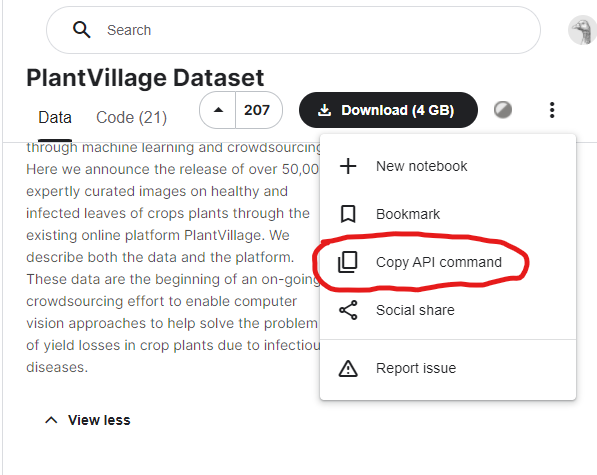

Kemudian API tersebut dicopy kan kesini

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:45<00:00, 81.2MB/s]
100% 2.04G/2.04G [00:45<00:00, 48.5MB/s]


## **Melakukan unzip file yang sudah didownload tadi, dan kemudian hasil ekstrak file tersebut dipindahkan kedalam directory lain yang sudah ditentukan**

In [ ]:
local_zip = '/content/plantvillage-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/dataset_awal')

zip_ref.close()

Setelah diekstrak ke dalam directory tersebut, selanjutnya buat folder baru bernama data_tomat, dan pindahlan dataset tomat ke folder tersebut


# 1.2 DATA EXPLORATION dan VERIFIKASI DATA

melihat jumlah data tomat yang didapatkan dan melihat masing-masing jumlah kategori penyakit tomat dan ukuran dari image yang didapatkan

## **Melihat ukuran semua image yang didapatkan**

In [ ]:
list_tomat_awal = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing')
list_tomat_awal

['Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Early_blight']

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___healthy',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Target_Spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sebelum_preprocessing/Tomato___Late_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPS

In [ ]:
lebar = []
panjang = []
nama = []

for folder_images in total:
  for dirpath, _, filenames in os.walk(folder_images):
      for path_image in filenames:
          image = os.path.abspath(os.path.join(dirpath, path_image))
          with Image.open(image) as img:
              width, heigth = img.size
              nama.append(path_image)
              lebar.append(width)
              panjang.append(heigth)


In [ ]:
df_ukuran = pd.DataFrame({'File':nama,
                          'Width':lebar,
                          'Height':panjang})
df_ukuran

,File,Width,Height
0,35343df4-2017-47f9-a5ef-d08bd52dfd7c___Crnl_L....,256,256
1,43728975-7569-464b-b67d-a2b3d0f5ddd5___Crnl_L....,256,256
2,63ed021f-afc3-44cc-ab70-0bacc9815d3e___Crnl_L....,256,256
3,82567342-f689-4e61-ac38-b25db55bb684___Crnl_L....,256,256
4,c92cbefd-7687-4a82-a07e-95cf5990c1d9___Crnl_L....,256,256
...,...,...,...
18161,fe856320-407c-4390-9960-a6a539371182___RS_Erly...,256,256
18162,ff422d28-d002-4382-80bf-30f78f66c677___RS_Erly...,256,256
18163,fe46f781-a40c-4c73-9e2c-50872f1ab370___RS_Erly...,256,256
18164,ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly...,256,256


In [ ]:
df_ukuran.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.csv')

In [ ]:
data_ukuran = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.csv')

In [ ]:
data_ukuran = data_ukuran[['File','Width','Height']]
data_ukuran

,File,Width,Height
0,35343df4-2017-47f9-a5ef-d08bd52dfd7c___Crnl_L....,256,256
1,43728975-7569-464b-b67d-a2b3d0f5ddd5___Crnl_L....,256,256
2,63ed021f-afc3-44cc-ab70-0bacc9815d3e___Crnl_L....,256,256
3,82567342-f689-4e61-ac38-b25db55bb684___Crnl_L....,256,256
4,c92cbefd-7687-4a82-a07e-95cf5990c1d9___Crnl_L....,256,256
...,...,...,...
18161,fe856320-407c-4390-9960-a6a539371182___RS_Erly...,256,256
18162,ff422d28-d002-4382-80bf-30f78f66c677___RS_Erly...,256,256
18163,fe46f781-a40c-4c73-9e2c-50872f1ab370___RS_Erly...,256,256
18164,ff83852f-65e0-4981-8c66-6b86d34b32c2___RS_Erly...,256,256


In [ ]:
data_ukuran.to_excel('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_penyakit_tomat_Size.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [ ]:
df_ukuran['Width'].value_counts()

256    18166
Name: Width, dtype: int64

In [ ]:
df_ukuran['Height'].value_counts()

256    18166
Name: Height, dtype: int64

# **2. DATA PREPARATION**

Data preparation terdiri dari Data cleaning, Data selection dan Data Transformation

Data Celaning => mengganti nama file disesuaikan dengan folder secara lokal

Data selection => dilakukan pembagian data menjadi val, train, test

Data transformation => melakukan scaling, normalization, augmentasi




# 2.1 DATA CLEANING

buat folder baru yang bernama sesudah_preprocesing yang berisi 3 folder yaitu folder early_blight, sehat, dan folder penyakit lainnya yang berisi gambar daun tomat yang terkena penyakit selain earl_blight


## **Setelah dibuat 3 folder tadi didalam fodler  sesudah_preprocesing, selanjutnya seluruh masing-masing gambar direname berdasarkan nama folder nya (rename secara manual)**

## **Setelah itu buat folder-folder yang dibutuhkan dalam setiap proses, diantaranya folder data_csv_A, data_csv_B, data_csv_C, serta folder model yang didalamnya terdapat fodler modelA, modelB, modelC (buat di google drive)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

## **Mempersiapkan data training, validation, dan testing**

SKENARIO SPLIT DATA :

- A => 80% training : 10% validation : 10% tetsing
- B => 70% training : 15% validation : 15% tetsing

# **A. SKENARIO PEMBAGIAN DATA (80:10:10)**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A", seed=1337, ratio=(.8, .1, .1))

Copying files: 3000 files [01:37, 30.83 files/s]


In [ ]:
os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A')

['train', 'val', 'test']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

In [ ]:
#sel ini happus aja

tomat_path =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/{tomat}')
  tomat_path.append(dir)
  print(f'Jumlah image tomat {tomat} : {len(os.listdir(dir))}')

Jumlah image tomat early_blight : 1000
Jumlah image tomat sehat : 1000
Jumlah image tomat penyakit_lainnya : 1000


In [ ]:
tomat_path

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/penyakit_lainnya']

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (668).JPG,0
1,early_blight (423).JPG,0
2,early_blight (405).JPG,0
3,early_blight (779).JPG,0
4,early_blight (404).JPG,0
...,...,...
295,penyakit_lainnya (583).JPG,2
296,penyakit_lainnya (515).JPG,2
297,penyakit_lainnya (522).JPG,2
298,penyakit_lainnya (497).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv')

In [ ]:
len(df_test)

300

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (668).JPG,0
1,early_blight (423).JPG,0
2,early_blight (405).JPG,0
3,early_blight (779).JPG,0
4,early_blight (404).JPG,0
...,...,...
295,penyakit_lainnya (583).JPG,2
296,penyakit_lainnya (515).JPG,2
297,penyakit_lainnya (522).JPG,2
298,penyakit_lainnya (497).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/val/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (674).JPG,0
1,early_blight (449).JPG,0
2,early_blight (548).JPG,0
3,early_blight (693).JPG,0
4,early_blight (381).JPG,0
...,...,...
295,penyakit_lainnya (597).JPG,2
296,penyakit_lainnya (530).JPG,2
297,penyakit_lainnya (608).JPG,2
298,penyakit_lainnya (584).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/val_early_blight.csv')

In [ ]:
len(df_val)

300

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (674).JPG,0
1,early_blight (449).JPG,0
2,early_blight (548).JPG,0
3,early_blight (693).JPG,0
4,early_blight (381).JPG,0
...,...,...
295,penyakit_lainnya (597).JPG,2
296,penyakit_lainnya (530).JPG,2
297,penyakit_lainnya (608).JPG,2
298,penyakit_lainnya (584).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (362).JPG,0
1,early_blight (603).JPG,0
2,early_blight (545).JPG,0
3,early_blight (369).JPG,0
4,early_blight (790).JPG,0
...,...,...
2395,penyakit_lainnya (537).JPG,2
2396,penyakit_lainnya (579).JPG,2
2397,penyakit_lainnya (568).JPG,2
2398,penyakit_lainnya (491).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/train_early_blight.csv')

In [ ]:
len(df_train)

2400

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (362).JPG,0
1,early_blight (603).JPG,0
2,early_blight (545).JPG,0
3,early_blight (369).JPG,0
4,early_blight (790).JPG,0
...,...,...
2395,penyakit_lainnya (537).JPG,2
2396,penyakit_lainnya (579).JPG,2
2397,penyakit_lainnya (568).JPG,2
2398,penyakit_lainnya (491).JPG,2


## **Membuat data total format .csv**

In [ ]:
total =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/{tomat}')
  total.append(dir)

total

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in total:
  for tomat in os.listdir(i):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i.split('/')[9])
    else:
      names.append(tomat)
      categories.append(i.split('/')[9])
    
df_total = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_total

,filename,category
0,early_blight (797).JPG,early_blight
1,early_blight (579).JPG,early_blight
2,early_blight (466).JPG,early_blight
3,early_blight (361).JPG,early_blight
4,early_blight (845).JPG,early_blight
...,...,...
2995,penyakit_lainnya (579).JPG,penyakit_lainnya
2996,penyakit_lainnya (556).JPG,penyakit_lainnya
2997,penyakit_lainnya (501).JPG,penyakit_lainnya
2998,penyakit_lainnya (558).JPG,penyakit_lainnya


## **Simpan df_total dengan nama total_early_blight.csv**

In [ ]:
df_total.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_early_blight.csv')

In [ ]:
#test load csv

df_total = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/total_early_blight.csv')
df_total = df_total[['filename','category']] #biar kolom unamed nya ilang
df_total

,filename,category
0,early_blight (797).JPG,early_blight
1,early_blight (579).JPG,early_blight
2,early_blight (466).JPG,early_blight
3,early_blight (361).JPG,early_blight
4,early_blight (845).JPG,early_blight
...,...,...
2995,penyakit_lainnya (579).JPG,penyakit_lainnya
2996,penyakit_lainnya (556).JPG,penyakit_lainnya
2997,penyakit_lainnya (501).JPG,penyakit_lainnya
2998,penyakit_lainnya (558).JPG,penyakit_lainnya


## **Buat grafik perbandingan jumlah dari masing-masing kelas prediksi**

early_blight        1000
sehat               1000
penyakit_lainnya    1000
Name: category, dtype: int64

 Total images:  3000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


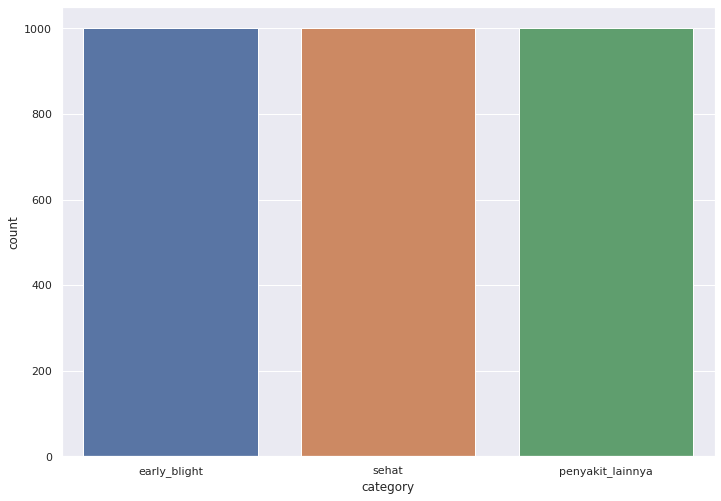

In [ ]:
print(df_total.category.value_counts())
print("\n Total images: ", df_total.shape[0])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df_total.category)
plt.show()

# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

### **ROTATION**

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset

train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 180,
                                   width_shift_range = [-50,0,50,40,-30,60,70,80],
                                   height_shift_range= 0.2,
                                   shear_range=60,
                                   zoom_range =[0.2,1.6],
                                   brightness_range=[0,2],
                                   featurewise_std_normalization = True,
                                   horizontal_flip = True,
                                   vertical_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0.2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001


# **A1. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-1**


====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0,2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

74850304/74836368 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(512, activation='relu')(x)

# Dropout
x = layers.Dropout(0.2)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


## **Training Model**

In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 23.4179 - acc: 0.4102 
Epoch 1: val_acc improved from -inf to 0.66667, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1.h5
8/8 [==============================] - 332s 42s/step - loss: 23.4179 - acc: 0.4102 - val_loss: 1.7420 - val_acc: 0.6667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 4.6546 - acc: 0.5273 
Epoch 2: val_acc did not improve from 0.66667
8/8 [==============================] - 101s 13s/step - loss: 4.6546 - acc: 0.5273 - val_loss: 2.8911 - val_acc: 0.6067
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 3.0878 - acc: 0.6016 
Epoch 3: val_acc improved from 0.66667 to 0.67000, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1.h5
8/8 [==============================] - 104s 13s/step - loss: 3.0878 - acc: 0.6016 - val_loss: 1.7730 - val_acc: 0.6700
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 2.

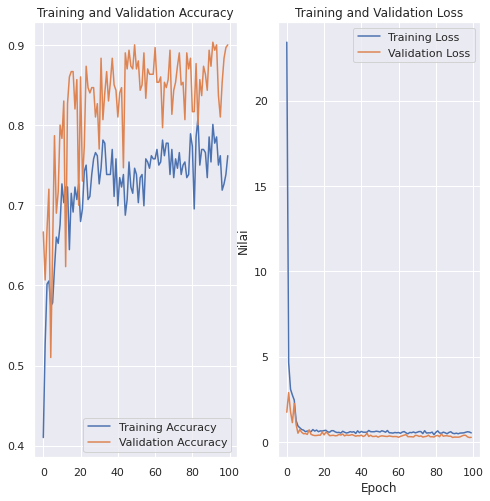

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 5s 158ms/step - loss: 0.2843 - acc: 0.9033

 Test accuracy: 0.903333306312561
Running time: --- 6.075790643692017 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 140s 16s/step - loss: 0.3529 - acc: 0.8633

 Test accuracy: 0.8633333444595337
Running time: --- 142.6225757598877 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatA.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 17s 25ms/step
[2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 2 0
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 1 2 2 2
 2 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[82,  2, 16],
       [ 1, 99,  0],
       [13,  9, 78]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


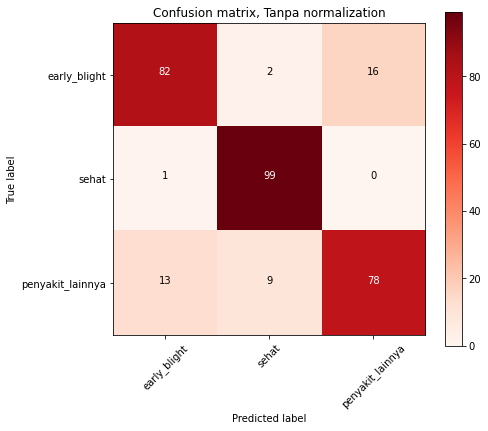

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.90      0.99      0.94       100
           2       0.83      0.78      0.80       100

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A1.h5')

Saving sehat (63).JPG to sehat (63).JPG
[[0.37357002 0.15724173 0.46918824]]
2
penyakit_lainnya


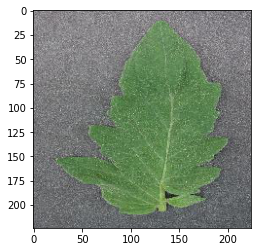

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **A2. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-2**

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(256, activation='relu')(x)

# Dropout
x = layers.Dropout(0.5)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 230, 230, 3)  0          ['input_7[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_12[0][0]']      
                                )                                                           

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 5.0211 - acc: 0.4102
Epoch 1: val_acc improved from -inf to 0.33667, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2.h5
8/8 [==============================] - 22s 2s/step - loss: 5.0211 - acc: 0.4102 - val_loss: 1.2301 - val_acc: 0.3367
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.0494 - acc: 0.4414
Epoch 2: val_acc did not improve from 0.33667
8/8 [==============================] - 7s 869ms/step - loss: 1.0494 - acc: 0.4414 - val_loss: 1.2097 - val_acc: 0.3333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.0329 - acc: 0.4062
Epoch 3: val_acc improved from 0.33667 to 0.57333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2.h5
8/8 [==============================] - 10s 1s/step - loss: 1.0329 - acc: 0.4062 - val_loss: 0.9190 - val_acc: 0.5733
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.9655 - ac

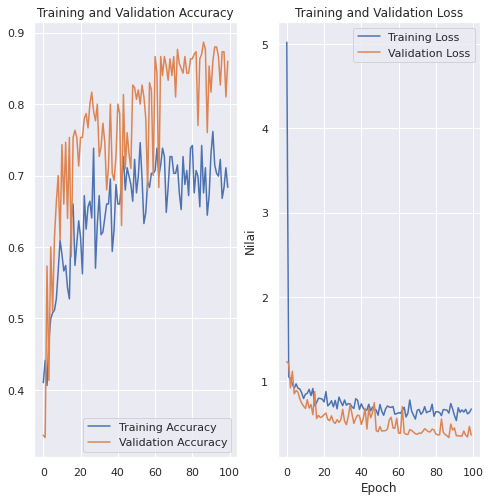

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 5s 148ms/step - loss: 0.3512 - acc: 0.8867

 Test accuracy: 0.8866666555404663
Running time: --- 4.894493103027344 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 2s 147ms/step - loss: 0.4088 - acc: 0.8267

 Test accuracy: 0.8266666531562805
Running time: --- 2.7339351177215576 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatA2.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 7s 31ms/step
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 0 2 2 2 2 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0
 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 2 2 2 0
 2 2 2 2 2 2 0 2 0 2 2 2 1 0 2 2 1 0 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[85,  1, 14],
       [ 3, 91,  6],
       [25,  3, 72]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


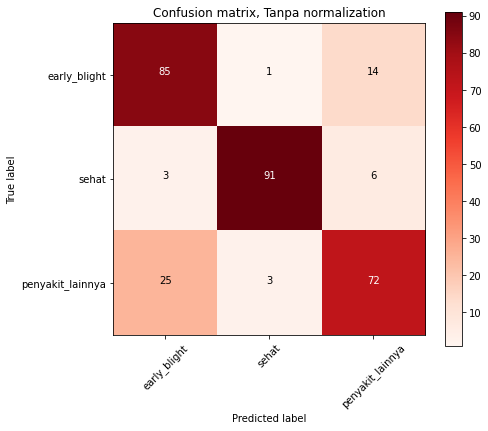

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.96      0.91      0.93       100
           2       0.78      0.72      0.75       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A2.h5')

Saving early_blight (16).JPG to early_blight (16).JPG
[[0.2403026  0.19262654 0.56707084]]
2
penyakit_lainnya


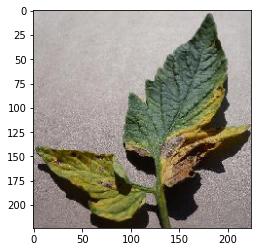

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **A3. SKENARIO PEMBAGIAN DATA (80:10:10) DENGAN HYPERPARAMETER KE-3**

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(128, activation='relu')(x)

# Dropout
x = layers.Dropout(0.7)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 230, 230, 3)  0          ['input_6[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_10[0][0]']      
                                )                                                           

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 2.5316 - acc: 0.3516
Epoch 1: val_acc improved from -inf to 0.33333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5
8/8 [==============================] - 24s 2s/step - loss: 2.5316 - acc: 0.3516 - val_loss: 1.6976 - val_acc: 0.3333
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.4140 - acc: 0.4531
Epoch 2: val_acc improved from 0.33333 to 0.57333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5
8/8 [==============================] - 10s 1s/step - loss: 1.4140 - acc: 0.4531 - val_loss: 0.9220 - val_acc: 0.5733
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.1028 - acc: 0.4336
Epoch 3: val_acc improved from 0.57333 to 0.59000, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5
8/8 [==============================] - 8s 1s/step - loss: 1.1028 - acc: 0.4336 - val_loss: 0.8698 - val_acc: 0.5

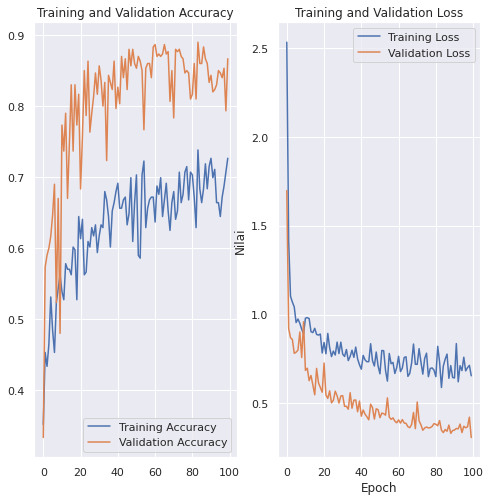

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 5s 147ms/step - loss: 0.3498 - acc: 0.8900

 Test accuracy: 0.8899999856948853
Running time: --- 5.896976947784424 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 300 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

10/10 [==============================] - 2s 151ms/step - loss: 0.4677 - acc: 0.8300

 Test accuracy: 0.8299999833106995
Running time: --- 2.7520039081573486 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_A/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_A/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatA3.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

150/150 [==============================] - 7s 29ms/step
[0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 2 1 1 2 2 2 0 2 0 2 2 0 0 2 2 0 2 2 2 2 0 2 0 0 2 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 0 2 0 2 0 2 2 2 2 0 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Name: category, Length: 300, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[82,  0, 18],
       [ 3, 86, 11],
       [18,  1, 81]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_A/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


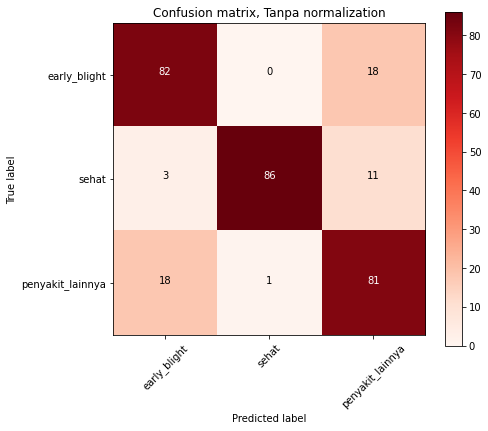

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.99      0.86      0.92       100
           2       0.74      0.81      0.77       100

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_A3.h5')

Saving sehat (9).JPG to sehat (9).JPG
[[7.6172376e-01 5.1368441e-04 2.3776256e-01]]
0
early_blight


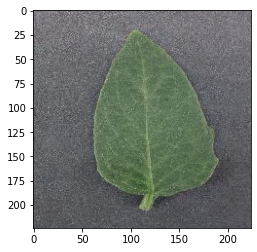

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **B. SKENARIO PEMBAGIAN DATA (70:15:15)**

# 2.2 DATA SELECTION

## **Menginstal library split_folders untuk melakukan data selection atau membagi data menjadi data training, validation dan testing secara otomatis**

In [ ]:
!pip install split_folders

## **Mempersiapkan data training, validation, dan testing**

In [ ]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing', 
                  output="/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B", seed=1337, ratio=(.7, .15, .15))

Copying files: 3000 files [01:07, 44.12 files/s] 


In [ ]:
os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B')

['train', 'val', 'test']

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

## **membuat variabel untuk folder data train test dan val**

In [ ]:
base_path = "/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

## **Membuat data test format .csv**

In [ ]:
test =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/{tomat}')
  test.append(dir)

test

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/test/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(test[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Simpan variabel df_test dengan nama test_early_blight.csv**

In [ ]:
df_test.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv')

In [ ]:
len(df_test)

450

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv')
df_test = df_test[['filename','category']] #biar kolom unamed nya ilang
df_test

,filename,category
0,early_blight (503).JPG,0
1,early_blight (275).JPG,0
2,early_blight (170).JPG,0
3,early_blight (854).JPG,0
4,early_blight (39).JPG,0
...,...,...
445,penyakit_lainnya (435).JPG,2
446,penyakit_lainnya (752).JPG,2
447,penyakit_lainnya (590).JPG,2
448,penyakit_lainnya (951).JPG,2


## **Membuat data val format .csv**

In [ ]:
val =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/{tomat}')
  val.append(dir)

val

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/val/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(val[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Simpan df_val dengan nama val_early_blight.csv**

In [ ]:
df_val.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/val_early_blight.csv')

In [ ]:
len(df_val)

450

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/val_early_blight.csv')
df_val = df_val[['filename','category']] #biar kolom unamed nya ilang
df_val

,filename,category
0,early_blight (387).JPG,0
1,early_blight (808).JPG,0
2,early_blight (904).JPG,0
3,early_blight (472).JPG,0
4,early_blight (849).JPG,0
...,...,...
445,penyakit_lainnya (236).JPG,2
446,penyakit_lainnya (609).JPG,2
447,penyakit_lainnya (147).JPG,2
448,penyakit_lainnya (331).JPG,2


## **Membuat data train format .csv**

In [ ]:
train =[]
for tomat in list_tomat:
  dir = os.path.join(f'/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/{tomat}')
  train.append(dir)

train

['/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/early_blight',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/sehat',
 '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train/penyakit_lainnya']

In [ ]:
categories = []
names = []

for i in range(3):
  for tomat in os.listdir(train[i]):
    if tomat in names:
      names.remove(tomat)
      categories.remove(i)
    else:
      names.append(tomat)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


## **Simpan df_train dengan nama train_early_blght.csv**

In [ ]:
df_train.to_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/train_early_blight.csv')

In [ ]:
len(df_train)

2100

In [ ]:
#train load csv

df_train = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/train_early_blight.csv')
df_train = df_train[['filename','category']] #biar kolom unamed nya ilang
df_train

,filename,category
0,early_blight (313).JPG,0
1,early_blight (378).JPG,0
2,early_blight (19).JPG,0
3,early_blight (660).JPG,0
4,early_blight (10).JPG,0
...,...,...
2095,penyakit_lainnya (192).JPG,2
2096,penyakit_lainnya (68).JPG,2
2097,penyakit_lainnya (88).JPG,2
2098,penyakit_lainnya (491).JPG,2


# 2.3 DATA TRANSFORMATION

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 

In [ ]:
list_tomat = os.listdir('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/sesudah_preprocesing')
list_tomat

['early_blight', 'sehat', 'penyakit_lainnya']

In [ ]:
# Ketik code di atas di sini
# Augmentasi training dataset

train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 180,
                                   width_shift_range = [-50,0,50,40,-30,60,70,80],
                                   height_shift_range= 0.2,
                                   shear_range=60,
                                   zoom_range =[0.2,1.6],
                                   brightness_range=[0,2],
                                   featurewise_std_normalization = True,
                                   horizontal_flip = True,
                                   vertical_flip = True)

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

 # Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
                                    train_path,
                                    classes=list_tomat,
                                    target_size=(224, 224), #ubah ke 224 
                                    batch_size=32,
                                    class_mode="categorical")

validation_generator =  validation_datagen.flow_from_directory(
          validation_path,
          classes=list_tomat, 
          target_size=(224, 224), # Ubah ke 224
          batch_size=32,
          class_mode='categorical',
          shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


# **3. MODELING**

# 3.1 SELECT MODELING TECHNIQUES (Transfer Learning)

## **Membuat skenario kombinasi beberapa hyperparameter tuning sebanyak 3 kombinasi**

SKENARIO KOMBINASI HYPERPARAM

====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0.2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001


# **B1. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-1**


====Skenario 1====
- layers (jumlah fully conected layer) = 512
- Dropout                              = 0,2
- jenis optimizer                      = Adam
- besar learning_rate                  = -

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(512, activation='relu')(x)

# Dropout
x = layers.Dropout(0.2)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_8[0][0]']       
                                )                                                           

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 24.4011 - acc: 0.3566
Epoch 1: val_acc improved from -inf to 0.36667, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5
8/8 [==============================] - 188s 23s/step - loss: 24.4011 - acc: 0.3566 - val_loss: 17.9622 - val_acc: 0.3667
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 9.1581 - acc: 0.5000
Epoch 2: val_acc improved from 0.36667 to 0.45111, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5
8/8 [==============================] - 56s 7s/step - loss: 9.1581 - acc: 0.5000 - val_loss: 5.9573 - val_acc: 0.4511
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 5.7950 - acc: 0.5391
Epoch 3: val_acc improved from 0.45111 to 0.69556, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5
8/8 [==============================] - 42s 5s/step - loss: 5.7950 - acc: 0.5391 - val_loss: 2.6129 - val_ac

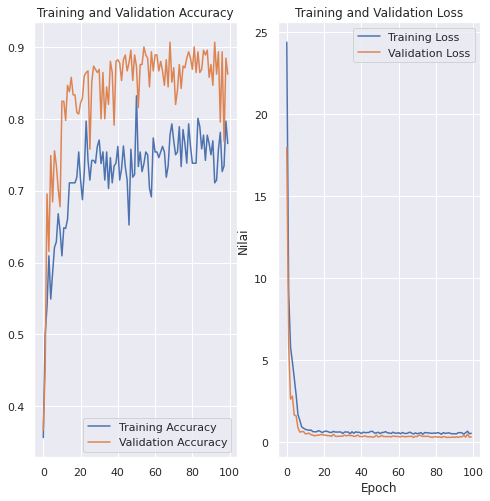

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 5s 143ms/step - loss: 0.2718 - acc: 0.9067

 Test accuracy: 0.9066666960716248
Running time: --- 5.326274633407593 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 76s 5s/step - loss: 0.3464 - acc: 0.8600

 Test accuracy: 0.8600000143051147
Running time: --- 77.59593415260315 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatB1.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 9s 29ms/step
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 0 2 0 0 0 2 2 2
 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 0 2 0 2 2 2 2 0
 2 0 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 2 1 0 2 2
 2 2 2 2 2 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 1 1 2 2 2
 0 2 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[123,   1,  26],
       [  1, 143,   6],
       [ 20,   9, 121]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


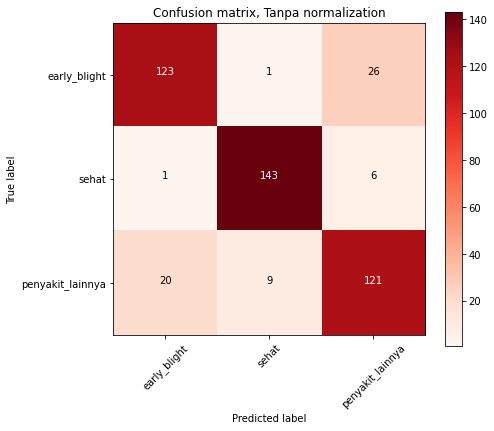

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       150
           1       0.93      0.95      0.94       150
           2       0.79      0.81      0.80       150

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B1.h5')

Saving penyakit_lainnya (88).JPG to penyakit_lainnya (88).JPG
[[2.0428672e-06 9.9988556e-01 1.1241693e-04]]
1
sehat


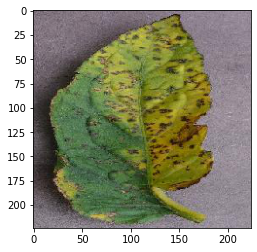

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **B2. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-2**

====Skenario 2====
- layers (jumlah fully conected layer) = 256
- Dropout                              = 0.5
- jenis optimizer                      = SGD
- besar learning_rate                  = 0.01

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(256, activation='relu')(x)

# Dropout
x = layers.Dropout(0.5)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 7.6855 - acc: 0.3477
Epoch 1: val_acc improved from -inf to 0.35556, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5
8/8 [==============================] - 21s 2s/step - loss: 7.6855 - acc: 0.3477 - val_loss: 1.0408 - val_acc: 0.3556
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.0468 - acc: 0.4180
Epoch 2: val_acc improved from 0.35556 to 0.35778, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5
8/8 [==============================] - 9s 1s/step - loss: 1.0468 - acc: 0.4180 - val_loss: 1.1295 - val_acc: 0.3578
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.0633 - acc: 0.4609
Epoch 3: val_acc improved from 0.35778 to 0.64000, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5
8/8 [==============================] - 9s 1s/step - loss: 1.0633 - acc: 0.4609 - val_loss: 0.8887 - val_acc: 0.64

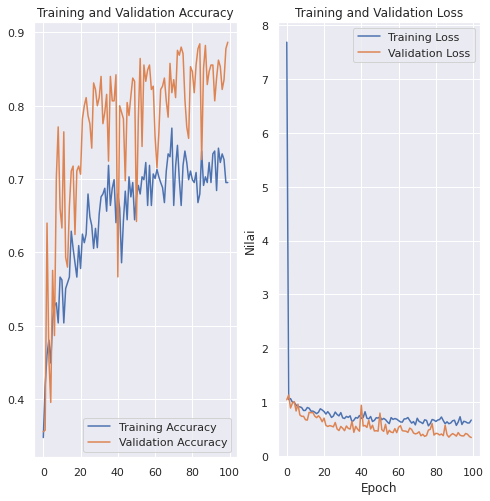

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 6s 145ms/step - loss: 0.3401 - acc: 0.8867

 Test accuracy: 0.8866666555404663
Running time: --- 6.260204792022705 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 2s 145ms/step - loss: 0.4013 - acc: 0.8400

 Test accuracy: 0.8399999737739563
Running time: --- 2.570793867111206 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatB2.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 9s 28ms/step
[2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 1 0 2 0 0 0 2 0 2
 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 2 2 2 1 0 2 0 2 2 0 2 2 0 2 1 2 2 2 2 2 2 1 0 2 0 2 2 2 2 0
 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 2 2 0 1 2 1 2 2 2 2 2 2 2 1 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 0 2 2 1 0 2 2
 2 2 2 2 2 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 1 2
 0 2 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[117,   3,  30],
       [  1, 146,   3],
       [ 20,  15, 115]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


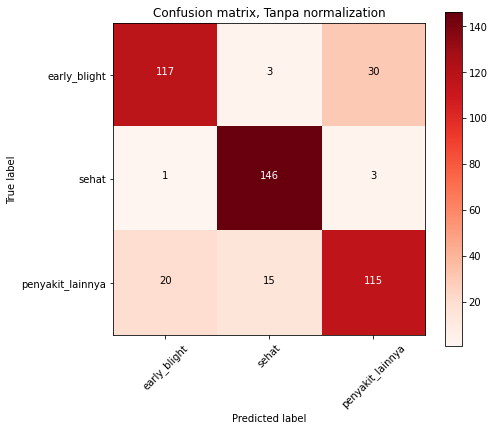

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       150
           1       0.89      0.97      0.93       150
           2       0.78      0.77      0.77       150

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



## **Testing Upload Gambar**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B2.h5')

Saving early_blight (12).JPG to early_blight (12).JPG
[[0.02824314 0.65114707 0.32060975]]
1
sehat


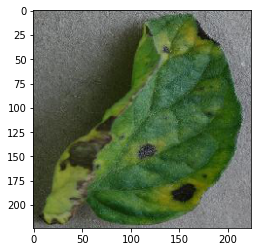

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = model.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **B3. SKENARIO PEMBAGIAN DATA (70:15:15) DENGAN HYPERPARAMETER KE-3**

====Skenario 3====
- layers (jumlah fully conected layer) = 128
- layer dropout                        = 0.7
- jenis optimizer                      = RMSprop 
- besar learning_rate                  = 0.0001

## **Import Model DenseNet201 dan Mengganti Layer Terakhir Model**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

base_model = tf.keras.applications.densenet.DenseNet201(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 3.2 BUILD MODEL

## **Mengganti Layer Terakhir Model**

In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fullt Connected Layer
x = layers.Dense(128, activation='relu')(x)

# Dropout
x = layers.Dropout(0.7)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_6[0][0]']       
                                )                                                           

# 3.2 BUILD MODEL

## **Training Model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B3.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=8, epochs=100, callbacks=[best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 2.5403 - acc: 0.3320
Epoch 1: val_acc improved from -inf to 0.55333, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B3.h5
8/8 [==============================] - 22s 2s/step - loss: 2.5403 - acc: 0.3320 - val_loss: 0.9250 - val_acc: 0.5533
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.3546 - acc: 0.4180
Epoch 2: val_acc improved from 0.55333 to 0.58222, saving model to /content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B3.h5
8/8 [==============================] - 10s 1s/step - loss: 1.3546 - acc: 0.4180 - val_loss: 0.9166 - val_acc: 0.5822
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.0017 - acc: 0.5078
Epoch 3: val_acc did not improve from 0.58222
8/8 [==============================] - 7s 896ms/step - loss: 1.0017 - acc: 0.5078 - val_loss: 1.0804 - val_acc: 0.4222
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 1.1602 - ac

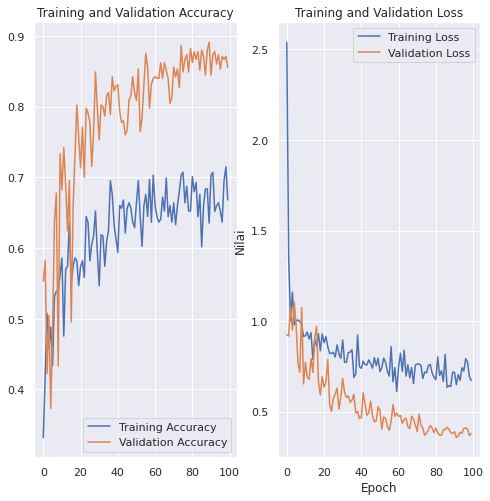

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B3.h5')

In [ ]:
model.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/model_B3')

# 3.3 ASSESS MODEL

## **Testing Model**

In [ ]:
start_time = time.time()
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 5s 153ms/step - loss: 0.3790 - acc: 0.8911

 Test accuracy: 0.8911111354827881
Running time: --- 5.466155290603638 seconds ---


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_tomat,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 450 images belonging to 3 classes.


In [ ]:
start_time = time.time()
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
print("Running time: --- %s seconds ---" % (time.time() - start_time))

15/15 [==============================] - 2s 143ms/step - loss: 0.4366 - acc: 0.8444

 Test accuracy: 0.8444444537162781
Running time: --- 2.782928228378296 seconds ---


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/test_B/' #ini harus dibikin folder baru 
test_df = pd.read_csv('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_csv_B/test_early_blight.csv') #ini test berupa csv nya

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/model2/test_preproc_projek_tomatB3.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

225/225 [==============================] - 9s 27ms/step
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 0 0 2 0 0 0 0 0 2
 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0
 0 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 1 2 2 2 2 2 2 1 0 2 0 2 1 2 2 0
 0 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2
 2 0 2 2 2 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2
 0 2 2 2 2 2]


In [ ]:
y_true = test_df['category']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
445    2
446    2
447    2
448    2
449    2
Name: category, Length: 450, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

## **Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[121,   1,  28],
       [  2, 141,   7],
       [ 25,   7, 118]])

In [ ]:
train_dir = '/content/drive/MyDrive/KULIAH/KULIAH/SKRIPSI/dataset/data_split_B/train'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


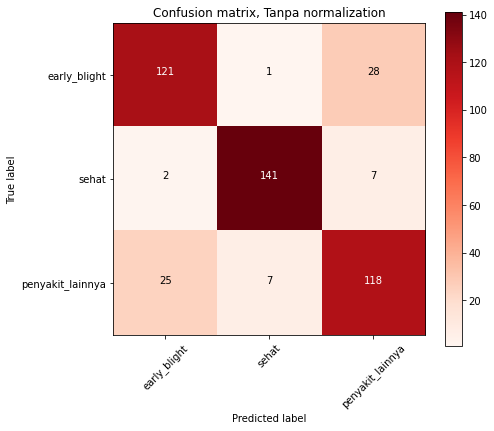

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, Tanpa normalization')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       150
           1       0.95      0.94      0.94       150
           2       0.77      0.79      0.78       150

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450

